# <span style="color:darkblue"> Lecture 12: Application 2 - Random Assignment </span>

<font size = "5">



# <span style="color:darkblue"> I. Import Libraries and Data </span>


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
carfeatures = pd.read_csv("data_raw/features.csv")

# <span style="color:darkblue"> I. Random Assignment </span>

<font size = "5">

Random assignment is crucial for scientific progress ...

- The basis for medical trials
- Also used in engineering, the natural sciences and <br>
  social sciences (economics, political science, etc.)


In [3]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.4,0.6]
size_dataset = len(carfeatures)

<font size = "5">
Random assignment


In [4]:
# The "np.random.choice" will create a vector with the status
# We will save this to a column in "carfeatures"
# Note: (i) We can always split the arguments of a function in multiple lines
#           to make it easier to read
#       (ii) 

carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Treatment
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Treatment
4,17.0,8,302,140,3449,10.5,F-1689824,Control
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Control
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Control


<font size = "5">

Compute frequencies by status

In [5]:
# The command "pd.crosstab" computes frequencies
# If we add the option "normalize" it will compute proportions
# Note: The default assignment is done randomly without replacement
#       which means that the proportions are approximately the same   
#       (but not equal) to "prop_status"

frequency_table   = pd.crosstab(index = carfeatures["status"], columns = "Frequency")
proportions_table = pd.crosstab(index = carfeatures["status"],
                                columns = "Frequency",
                                normalize = True)

display(frequency_table)
display(proportions_table)


col_0,Frequency
status,
Control,238
Treatment,160


col_0,Frequency
status,
Control,0.59799
Treatment,0.40201


<font size = "5">

Query with string conditions

In [6]:
# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

<font size = "5">

Treated/control should be similar

- This is the key principle of random assignment
- We can check the summary statistics

In [7]:
# The count is different because we assigned different proportions
# All other sumary statistics are approximately the same
# They are not identical because the assignment is random

display(data_treated.describe())
display(data_control.describe())

,mpg,cylinders,displacement,weight,acceleration
count,160.000000,160.000000,160.000000,160.000000,160.000000
mean,23.371875,5.418750,193.906250,2985.093750,15.408750
std,7.607173,1.698952,105.841153,849.861289,2.690617
min,10.000000,3.000000,70.000000,1613.000000,8.500000
25%,17.875000,4.000000,100.750000,2275.500000,13.950000
50%,22.450000,4.000000,148.500000,2851.500000,15.300000
75%,29.000000,6.500000,258.500000,3607.000000,17.000000
max,44.600000,8.000000,455.000000,4952.000000,23.700000


,mpg,cylinders,displacement,weight,acceleration
count,238.000000,238.000000,238.000000,238.000000,238.000000
mean,23.610504,5.478992,193.105042,2960.563025,15.675210
std,7.967747,1.705532,103.421067,846.455475,2.802398
min,9.000000,3.000000,68.000000,1649.000000,8.000000
25%,17.000000,4.000000,105.000000,2192.500000,13.750000
50%,23.000000,4.000000,148.500000,2792.500000,15.500000
75%,29.500000,8.000000,292.000000,3599.250000,17.375000
max,46.600000,8.000000,455.000000,5140.000000,24.800000


## <span style="color:darkblue"> III. Quiz Structure </span>

<font size = "5">

The day of the quiz I will ...
- Provide a dataset with information
- Give more specific instructions.
- Below, you will see the type of questions that will be asked.
- The idea is for you to apply known concepts to new data
- You have 50 minutes to complete the assignment

Questions

(exact wording may change in quiz, but exercise will be very similar)


<font size = "5">

(a) Create a function and apply it to a column

- Check Lecture 8 for how to define a function
- The function will have if/else statements and output a string
- You will use ".apply()" to create a new variable in the dataset <br>
(see Lecture 9)

In [9]:
def fn_string(x):
    if x > 30:
        return "You have a large MPG"
    else:
        return "Your MPG is small"
    
carfeatures['mpg'].apply(fn_string)


0         Your MPG is small
1         Your MPG is small
2         Your MPG is small
3         Your MPG is small
4         Your MPG is small
               ...         
393       Your MPG is small
394    You have a large MPG
395    You have a large MPG
396       Your MPG is small
397    You have a large MPG
Name: mpg, Length: 398, dtype: object

<font size = "5">

(b) Use queries + global variables

- You will be asked to compute certain summary statistics <br>
(mean, median, etc)
- The query will have multiple conditions
- Then subset a dataset that meets certain conditions
- See Lecture 10 for more details

In [16]:
# Compute Summary statistiics
m = carfeatures['mpg'].mean()
med = carfeatures['mpg'].median()
print(m)
print(med)
# Query with multiple conditions
data_rangeacceleration    = carfeatures.query("(acceleration >= 10) & (acceleration < 18)")
data_rangeacceleration.head(40)
# Subset a dataset that meets certain conditions
mpg_threshold = 25
cylinders_threshold = 8
data_mpg_cylinders = carfeatures.query("(mpg >= @mpg_threshold) and (cylinders == @cylinders_threshold)")

#If we need unique 
list_unique_cylinders = pd.unique(carfeatures["cylinders"])
print(list_unique_cylinders)

23.514572864321615
23.0


<font size = "5">

(c) Use sorting + ".loc[]"

- Extract the observations with the largest values of a column
- See Lecture 10 for details

In [18]:
# Sort values with highest at top
carsorted = carfeatures.sort_values(by = 'mpg', ascending = False)
display(carsorted)

#Extract observations with the largest values of a column 
display(carsorted.iloc[0,:])
# 3 largest
display(carsorted.iloc[[0,1,2],:])

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
322,46.6,4,86,65,2110,17.9,M-1693322,Control
329,44.6,4,91,67,1850,13.8,H-1693399,Treatment
325,44.3,4,90,48,2085,21.7,V-1693355,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Control
326,43.4,4,90,48,2335,23.7,V-1693366,Treatment
...,...,...,...,...,...,...,...,...
103,11.0,8,400,150,4997,14.0,C-1690913,Control
67,11.0,8,429,208,4633,11.0,M-1690517,Control
25,10.0,8,360,215,4615,14.0,F-1690055,Treatment
26,10.0,8,307,200,4376,15.0,C-1690066,Control


mpg                  46.6
cylinders               4
displacement           86
horsepower             65
weight               2110
acceleration         17.9
vehicle_id      M-1693322
status            Control
Name: 322, dtype: object

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
322,46.6,4,86,65,2110,17.9,M-1693322,Control
329,44.6,4,91,67,1850,13.8,H-1693399,Treatment
325,44.3,4,90,48,2085,21.7,V-1693355,Treatment


<font size = "5">

(d) Split a dataset into subsets

- You will be asked to randomly assign a status to each row
- Split the data into separate datasets using ".query()"
- This will closely follow the material in Lecture 12 (this one)
- You will need this result to answer questions (e), (f)


In [19]:
# "list_status" is a list with "treatment/control" arms
# "prop_status" is the proportion in the treatment and control arms
# "size_dataset" is how many rows are contained

list_status  = ["Treatment","Control"]
prop_status  = [0.7,0.3]
size_dataset = len(carfeatures)


carfeatures["status"] = np.random.choice(list_status,
                                         size = size_dataset,
                                         p = prop_status)

display(carfeatures)

# When you have queries for text variables, it's important
# to use outer ' ' single quotations
# and inner double quotations.

data_treated = carfeatures.query('status == "Treatment" ')
data_control = carfeatures.query('status == "Control" ')

,mpg,cylinders,displacement,horsepower,weight,acceleration,vehicle_id,status
0,18.0,8,307,130,3504,12.0,C-1689780,Treatment
1,15.0,8,350,165,3693,11.5,B-1689791,Control
2,18.0,8,318,150,3436,11.0,P-1689802,Treatment
3,16.0,8,304,150,3433,12.0,A-1689813,Control
4,17.0,8,302,140,3449,10.5,F-1689824,Treatment
...,...,...,...,...,...,...,...,...
393,27.0,4,140,86,2790,15.6,F-1694103,Treatment
394,44.0,4,97,52,2130,24.6,V-1694114,Control
395,32.0,4,135,84,2295,11.6,D-1694125,Treatment
396,28.0,4,120,79,2625,18.6,F-1694136,Treatment


<font size = "5">

(e) Create a function with four inputs $f(y,x,b0,b1)$

- Start by using "def" to define the function
- The function will include arithmetic operations (Lecture 3) <br>
and summary statistics for pandas (mean, std, min, max, etc.)
- You will be asked to test different values of $(y,x,b0,b1)$
- You will get $y$ and $x$ from the two datasets in part (d)
- Note: You will **not** be required to use the "statsmodels" library


In [22]:
ybar        = data_treated["mpg"].mean()
stdv_sample = data_treated["mpg"].std()
subset_data = data_treated.query("abs(mpg - @ybar) <= @stdv_sample")

<font size = "5">

(f) Create two overlapping histogram plots

- You will use a variable from the two datasets in (d)
- You need to use the "alpha" option to make the graphs semitransparent
- You will need to add a legend, label the axes, and the title
- Note: The goal of this question is to illustrate that random <br>
assignment produces very similar distributions between two groups

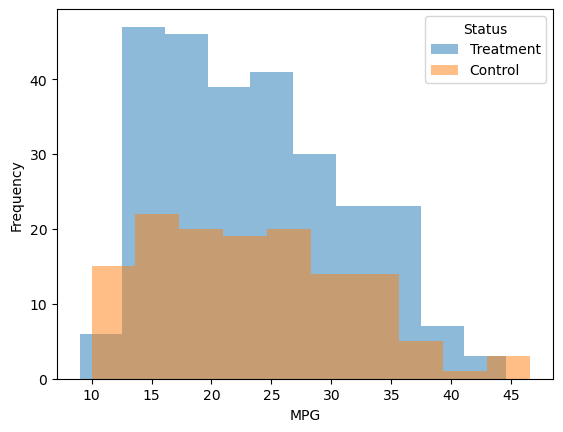

In [23]:
# Write your own code here
list_status = pd.unique(carfeatures['status'])
plt.hist(x=data_treated['mpg'], alpha = 0.5)
plt.hist(x=data_control['mpg'], alpha = 0.5)
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.legend(labels = list_status,
           title  = "Status")

